In [1]:
!pip install vizdoom

In [1]:
from vizdoom import DoomGame

In [2]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

In [3]:
game = DoomGame()
game.load_config('C:\\Users\\zzeba\\OneDrive\\Desktop\\Practicals\\Data Science\\ViZDoom\\scenarios\\basic.cfg')
game.init()

In [4]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [5]:
state = game.get_state()

In [6]:
state.game_variables

array([50.])

In [13]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
Result: -365.0
reward: -4

In [7]:
game.close()

In [10]:
!pip install gym==0.25.1

In [8]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [16]:
game.get_state().screen_buffer.shape

AttributeError: 'NoneType' object has no attribute 'screen_buffer'

In [9]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('C:\\Users\\zzeba\\OneDrive\\Desktop\\Practicals\\Data Science\\ViZDoom\\scenarios\\basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [10]:
env = VizDoomGym(render=True)

In [11]:
state = env.reset()

In [12]:
state.shape

(100, 160, 1)

In [19]:
env.step(2)

(array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]),
 99.0,
 True,
 {'info': 0})

In [175]:
from stable_baselines3.common import env_checker #need to remove this code

In [177]:
env_checker.check_env(env) #need to remove this code

AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

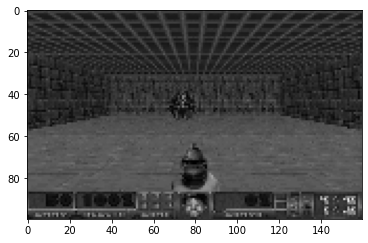

In [20]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [22]:
env.close()

In [165]:
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

^C


In [22]:
!pip install stable-baselines3[extra]

In [13]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

C:\Users\zzeba\anaconda3\lib\site-packages\tensorboard\compat\proto\histogram_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\zzeba\anaconda3\lib\site-packages\tensorboard\compat\proto\histogram_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\zzeba\anaconda3\lib\site-packages\tensorboard\compat\proto\histogram_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _HISTOGRAMPROTO = _descriptor.

In [14]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [25]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [26]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [17]:
# import ppo for training
from stable_baselines3 import PPO

In [18]:
# Non rendered environment
env = VizDoomGym()

In [29]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


C:\Users\zzeba\anaconda3\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [183]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | -53.3    |
| time/              |          |
|    fps             | 24       |
|    iterations      | 1        |
|    time_elapsed    | 82       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.8        |
|    ep_rew_mean          | -78.7       |
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 2           |
|    time_elapsed         | 263         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007409679 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -8.4e-05  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.1        |
|    ep_rew_mean          | -60.9       |
| time/                   |             |
|    fps                  | 11          |
|    iterations           | 11          |
|    time_elapsed         | 1909        |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.006077294 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.721      |
|    explained_variance   | 0.677       |
|    learning_rate        | 0.0001      |
|    loss                 | 1.58e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | 0.00419     |
|    value_loss           | 3.38e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 22.9  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 15.6        |
|    ep_rew_mean          | 5.87        |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 21          |
|    time_elapsed         | 3402        |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.015207803 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.525      |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0001      |
|    loss                 | 659         |
|    n_updates            | 200         |
|    policy_gradient_loss | 0.00367     |
|    value_loss           | 894         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.7  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 22.6        |
|    ep_rew_mean          | -40.6       |
| time/                   |             |
|    fps                  | 13          |
|    iterations           | 31          |
|    time_elapsed         | 4747        |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.014396042 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.52       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0001      |
|    loss                 | 890         |
|    n_updates            | 300         |
|    policy_gradient_loss | 0.00926     |
|    value_loss           | 950         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 18.2  


KeyboardInterrupt



In [25]:
 # Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [26]:
# Reload model from disc
model = PPO.load('./train/train_basic/best_model_70000')

In [27]:
# Create rendered environment
env = VizDoomGym(render=True)

In [29]:
# Evaluate mean reward for 100 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

C:\Users\zzeba\anaconda3\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
C:\Users\zzeba\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [203]:
model.predict(obs)

(array(2, dtype=int64), None)

In [28]:
# for episode in range(100): 
#     obs = env.reset()
#     done = False
#     total_reward = 0
#     while not done: 
#         action, _ = model.predict(obs)
#         obs, reward, done, info = env.step(action)
#         # time.sleep(0.20)
#         total_reward += reward
#     print('Total Reward for episode {} is {}'.format(total_reward, episode))
#     time.sleep(2)

In [24]:
env.close()